In [18]:
import pandas as pd

df = pd.read_csv('Downloads/jaccard.csv')

In [19]:
LB_M12125 = df['m12125'].dropna()

In [20]:
LB_M12125

0       'rxn00001_c0'
1       'rxn00003_c0'
2       'rxn00006_c0'
3       'rxn00010_c0'
4       'rxn00011_c0'
            ...      
1952       'rxn17779'
1953       'rxn18679'
1954       'rxn29825'
1955       'rxn17946'
1956       'rxn17585'
Name: m12125, Length: 1957, dtype: object

In [21]:
l1 = list(df['hi467'].dropna())
l2 = list(df['Rdkw20'].dropna())
l3 = list(df['m12125'].dropna())
l4 = list(df['kr494'].dropna())
l5 = list(df['n477'].dropna())
l6 = list(df['atcc10211'].dropna())

In [22]:
len(l1)

1959

In [23]:
model_reactions = [
    l1,l2,l3,l4,l5,l6
]

# model_reactions

In [24]:
from itertools import combinations

# Example reaction lists for 6 models (replace with your own data)


def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0  # Handle division by zero

# Calculate Jaccard similarity matrix
similarity_matrix = []
for i in range(len(model_reactions)):
    row = []
    for j in range(len(model_reactions)):
        if i == j:
            row.append(1.0)  # Similarity of a model to itself is 1
        else:
            model1_reactions = set(model_reactions[i])
            model2_reactions = set(model_reactions[j])
            similarity = jaccard_similarity(model1_reactions, model2_reactions)
            row.append(similarity)
    similarity_matrix.append(row)

# Print Jaccard similarity matrix
print("Jaccard Similarity Matrix:")
for row in similarity_matrix:
    print(row)


Jaccard Similarity Matrix:
[1.0, 0.9064327485380117, 0.9319190922545634, 0.9396039603960396, 0.899657366617719, 0.9233052944087086]
[0.9064327485380117, 1.0, 0.939484126984127, 0.9347181008902077, 0.9443050677370798, 0.9308457711442786]
[0.9319190922545634, 0.939484126984127, 1.0, 0.9453551912568307, 0.9308113489298159, 0.9473684210526315]
[0.9396039603960396, 0.9347181008902077, 0.9453551912568307, 1.0, 0.9337319382162431, 0.9503261414952333]
[0.899657366617719, 0.9443050677370798, 0.9308113489298159, 0.9337319382162431, 1.0, 0.9385699899295066]
[0.9233052944087086, 0.9308457711442786, 0.9473684210526315, 0.9503261414952333, 0.9385699899295066, 1.0]


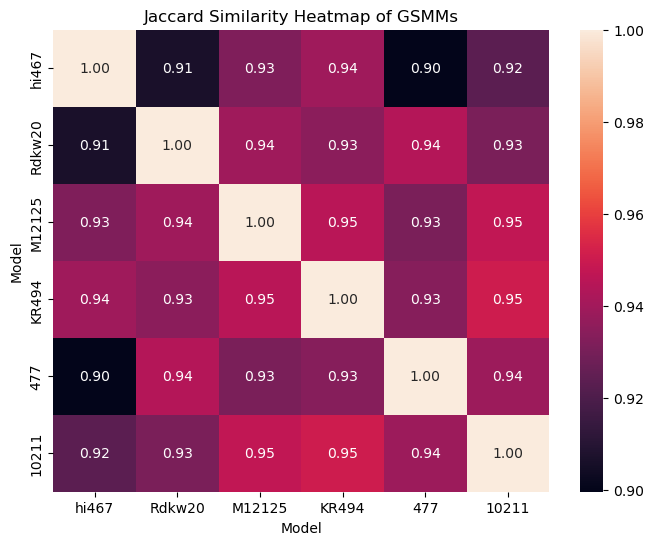

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example Jaccard similarity matrix (replace with your calculated matrix)

# Convert to numpy array
similarity_array = np.array(similarity_matrix)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_array, annot=True, fmt=".2f", xticklabels=['hi467','Rdkw20','M12125','KR494','477','10211'], yticklabels=['hi467','Rdkw20','M12125','KR494','477','10211'])
plt.title('Jaccard Similarity Heatmap of GSMMs')
plt.xlabel('Model')
plt.ylabel('Model')
plt.show()


In [8]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from collections import Counter


def jaccard_distance(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return 1 - (intersection / union if union != 0 else 0)  # Jaccard distance

# Calculate Jaccard distance matrix
distance_matrix = np.zeros((len(model_reactions), len(model_reactions)))
for i in range(len(model_reactions)):
    for j in range(len(model_reactions)):
        if i == j:
            distance_matrix[i, j] = 0
        else:
            model1_reactions = set(model_reactions[i])
            model2_reactions = set(model_reactions[j])
            distance_matrix[i, j] = jaccard_distance(model1_reactions, model2_reactions)

# Consensus clustering
n_clusters = 2  # Number of clusters
n_runs = 10  # Number of clustering runs
cluster_memberships = []

for _ in range(n_runs):
    # Agglomerative hierarchical clustering
    linkage_matrix = linkage(distance_matrix, method='average', metric='euclidean')
    cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=None)
    kmeans.fit(distance_matrix)
    kmeans_labels = kmeans.labels_

    # Combine cluster labels
    combined_labels = [tuple(labels) for labels in zip(cluster_labels, kmeans_labels)]
    cluster_memberships.append(combined_labels)

# Calculate consensus clustering
consensus_clusters = []
for i in range(len(model_reactions)):
    cluster_counts = Counter([cluster_memberships[j][i] for j in range(n_runs)])
    majority_cluster = cluster_counts.most_common(1)[0][0]
    consensus_clusters.append(majority_cluster)

# Print consensus clustering results
print("Consensus clustering results:")
for i, cluster in enumerate(consensus_clusters):
    print(f"Model {i+1}: Cluster {cluster}")


C:\Users\Subasree\AppData\Local\Temp\ipykernel_13292\1002094777.py:31: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='average', metric='euclidean')
C:\Users\Subasree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Subasree\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Subasree\anaconda3\lib\site-packages\joblib\exte

C:\Users\Subasree\AppData\Local\Temp\ipykernel_13292\1002094777.py:31: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='average', metric='euclidean')
C:\Users\Subasree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Subasree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Consensus clustering results:
Model 1: Cluster (1, 0)
Model 2: Cluster (1, 0)
Model 3: Cluster (2, 1)
Model 4: Cluster (1, 0)
Model 5: Cluster (1, 1)
Model 6: Cluster (1, 0)
